# Dynamic IS-LM Model Exercises

This notebook analyzes a closed economy with the following characteristics:

- **Total Demand:** $(D_t = C_t + I_t + G_t)$
  
- **Consumption Function:** \(C_t = \bar{C} + c\,(Y_{t-1} - T_{t-1})\)
- **Investment Function:** \(I_t = \bar{I} + \alpha\,Y_{t-1} - b\,i_{t-1}\)

### Parameters

- \(\bar{C} = 0.6, \quad \bar{I} = 0.2\)
- \(c = 0.5, \quad \alpha = 0.1, \quad b = 0.1\)
- Fiscal policy: \(G_t = T_t = 1.7\)
- Monetary policy: \(i_t = 0.04\)

The notebook is structured as follows:

1. **Mathematical Derivation**: We derive the steady state and dynamic transition solutions.
2. **Exercise 1**: Compute the base steady state.
3. **Exercise 2**: Compute the dynamic transition when \(Y_{-1} = 0.9Y^*\) for different values of \(c\).
4. **Exercise 3**: Analyze three policy shocks (increase in government spending, taxes, and nominal interest rate) applied to the original steady state, including the dynamics of employment \(L_t = 0.7Y_t\).

Let's start with the mathematical derivation.

## Mathematical Derivation

### Steady State

In steady state (\(Y_t = Y_{t-1} = Y\)), the model satisfies:

 \( Y = \bar{C} + c\,(Y - T) + \bar{I} + \alpha Y - b\,i + G \).

Collect the terms with \(Y\):

 \( Y - cY - \alpha Y = \bar{C} + \bar{I} + G - cT - b\,i \),

or

 \( Y (1 - c - \alpha) = \bar{C} + \bar{I} + G - cT - b\,i \).

Thus, the steady state output is given by:

 \[
 Y^* = \frac{\bar{C} + \bar{I} + G - cT - b\,i}{1 - c - \alpha}.
 \]

With the given parameters for \(c = 0.5\):

- \(\bar{C} + \bar{I} + G = 0.6 + 0.2 + 1.7 = 2.5\),
- \(cT + b\,i = 0.5 \times 1.7 + 0.1 \times 0.04 = 0.85 + 0.004 = 0.854\),
- \(1 - c - \alpha = 1 - 0.5 - 0.1 = 0.4\).

So,

 \[
 Y^* \approx \frac{2.5 - 0.854}{0.4} \approx \frac{1.646}{0.4} \approx 4.115.
 \]

### Dynamic Transition

Assume the economy starts at \(Y_{-1} = 0.9Y^*\). The dynamic equation is:

 \( Y_t = D + \beta\,Y_{t-1} \),

where

 \( D = \bar{C} + \bar{I} + G - cT - b\,i \) and \( \beta = c + \alpha \).

The general solution is:

 \[
 Y_t = Y^* + (Y_{-1} - Y^*)\,(\beta)^{t+1} \quad \text{or equivalently} \quad Y_t = Y^*\left[ 1 - 0.1\,(\beta)^{t+1} \right].
 \]

### Policy Shocks (Exercise 3)

When a policy change occurs at \(t=0\), the new external parameters become:

1. **Gov Spending +50%:** \(G' = 2.55\).

2. **Taxes +30%:** \(T' = 2.21\).

3. **Interest Rate +100bps:** \(i' = 0.05\).

For each change, the new steady state is computed by substituting the new value in:

 \[
 Y^{*}_{new} = \frac{\bar{C} + \bar{I} + G_{new} - cT_{new} - b\,i_{new}}{1 - c - \alpha}.
 \]

The dynamic transition is given by:

 \( Y_t = Y^{*}_{new} + (Y_{-1} - Y^{*}_{new})\,(\beta)^{t+1} \).

Employment is assumed to be a fixed fraction of output: \(L_t = \gamma Y_t\) with \(\gamma=0.7\).


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def get_params(c=0.5, G=1.7, T=1.7, i=0.04):
    return {
        'C_bar': 0.6,
        'I_bar': 0.2,
        'c': c,
        'alpha': 0.1,
        'b': 0.1,
        'G': G,
        'T': T,
        'i': i
    }

def steady_state(params):
    C_bar = params['C_bar']
    I_bar = params['I_bar']
    c = params['c']
    alpha = params['alpha']
    b = params['b']
    G = params['G']
    T = params['T']
    i = params['i']
    D = C_bar + I_bar + G - c * T - b * i
    beta = c + alpha
    Y_ss = D / (1 - beta)
    C_ss = C_bar + c * (Y_ss - T)
    I_ss = I_bar + alpha * Y_ss - b * i
    return Y_ss, C_ss, I_ss, D, beta

def dynamic_path(Y_init, params, periods=20):
    C_bar = params['C_bar']
    I_bar = params['I_bar']
    c = params['c']
    alpha = params['alpha']
    b = params['b']
    T = params['T']
    i = params['i']
    _, _, _, D, beta = steady_state(params)
    Y = np.zeros(periods + 1)
    C = np.zeros(periods + 1)
    I = np.zeros(periods + 1)
    # For dynamic transition, initial period uses Y_init
    Y[0] = D + beta * Y_init
    C[0] = C_bar + c * (Y_init - T)
    I[0] = I_bar + alpha * Y_init - b * i
    for t in range(1, periods + 1):
        Y[t] = D + beta * Y[t-1]
        C[t] = C_bar + c * (Y[t-1] - T)
        I[t] = I_bar + alpha * Y[t-1] - b * i
    return Y, C, I

gamma = 0.7  # Employment factor: L = gamma * Y

In [5]:
# Exercise 1: Compute the Base Steady State (for c = 0.5)
base_params = get_params(c=0.5)
Y_ss, C_ss, I_ss, D, beta = steady_state(base_params)
print("Exercise 1: Base Steady State (c = 0.5)")
print(f"Y_ss = {Y_ss:.4f}")
print(f"C_ss = {C_ss:.4f}")
print(f"I_ss = {I_ss:.4f}")

Exercise 1: Base Steady State (c = 0.5)
Y_ss = 4.1150
C_ss = 1.8075
I_ss = 0.6075


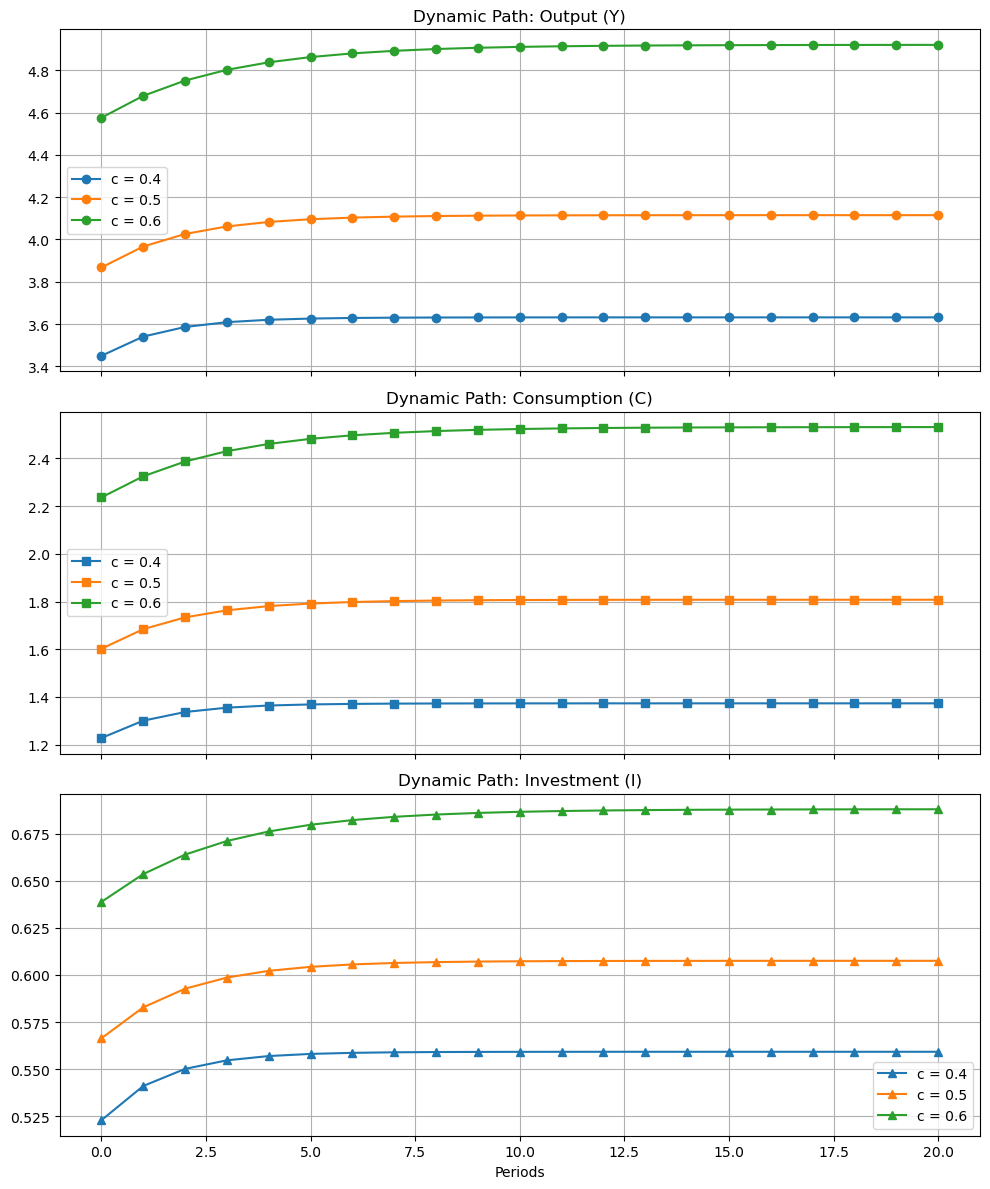

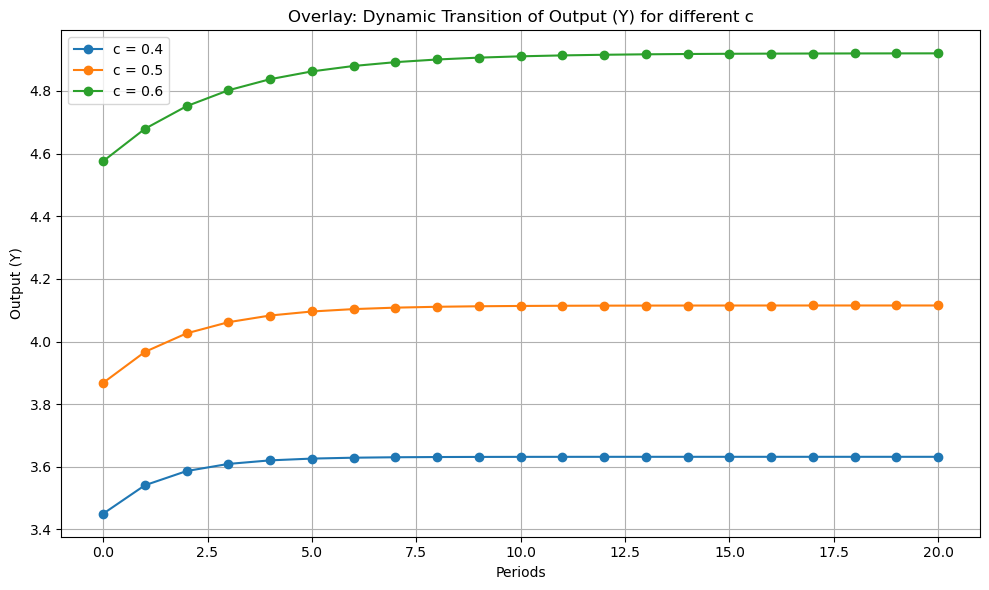

In [7]:
# Exercise 2: Dynamic Transition with Y₋₁ = 0.9 × Y_ss for various c-values
c_values = [0.4, 0.5, 0.6]
periods = 20

fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
Y_paths = {}
for c_val in c_values:
    p = get_params(c=c_val)
    Y_ss_i, _, _, _, _ = steady_state(p)
    # Set initial condition as 0.9 × the steady state corresponding to each c
    Y0 = 0.9 * Y_ss_i
    Ydyn, Cdyn, Idyn = dynamic_path(Y0, p, periods)
    t = np.arange(0, periods+1)
    Y_paths[c_val] = Ydyn
    axs[0].plot(t, Ydyn, marker='o', label=f'c = {c_val}')
    axs[1].plot(t, Cdyn, marker='s', label=f'c = {c_val}')
    axs[2].plot(t, Idyn, marker='^', label=f'c = {c_val}')

axs[0].set_title('Dynamic Path: Output (Y)')
axs[1].set_title('Dynamic Path: Consumption (C)')
axs[2].set_title('Dynamic Path: Investment (I)')
for ax in axs:
    ax.legend()
    ax.grid(True)
axs[2].set_xlabel('Periods')
plt.tight_layout()
plt.show()

# Overlay of Y paths for different c-values
plt.figure(figsize=(10,6))
for c_val, Ydyn in Y_paths.items():
    plt.plot(np.arange(0, periods+1), Ydyn, marker='o', label=f'c = {c_val}')
plt.title('Overlay: Dynamic Transition of Output (Y) for different c')
plt.xlabel('Periods')
plt.ylabel('Output (Y)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

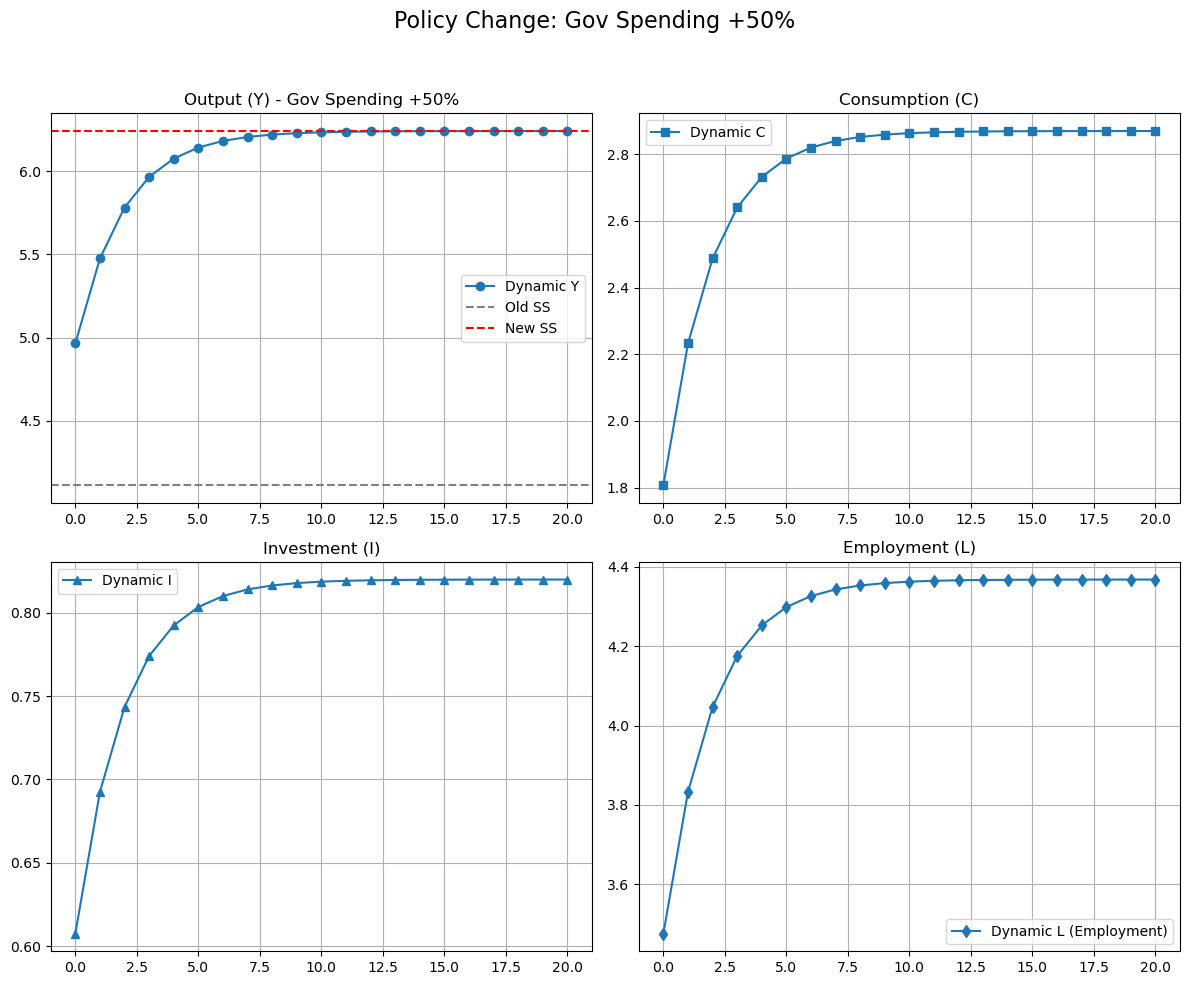

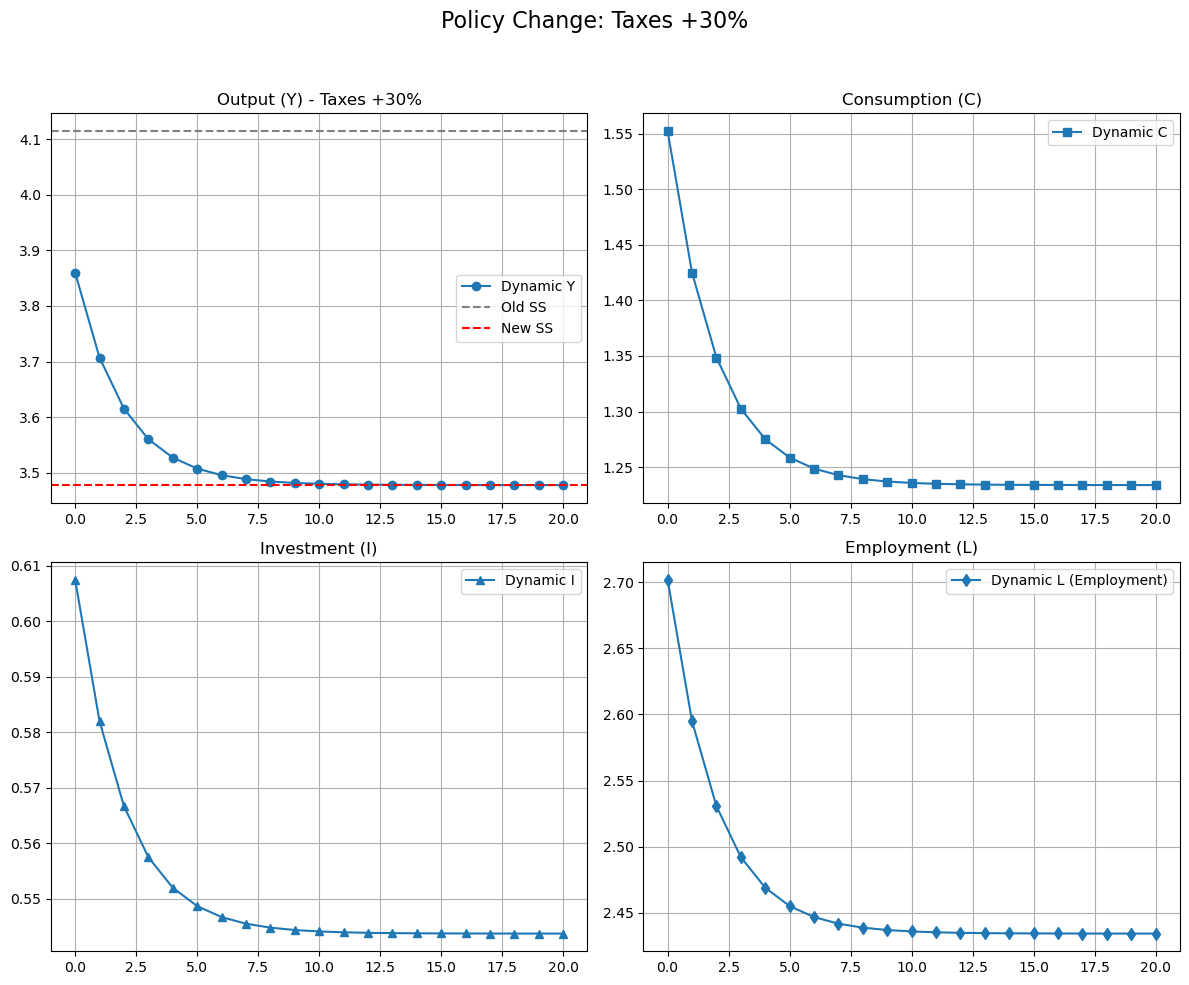

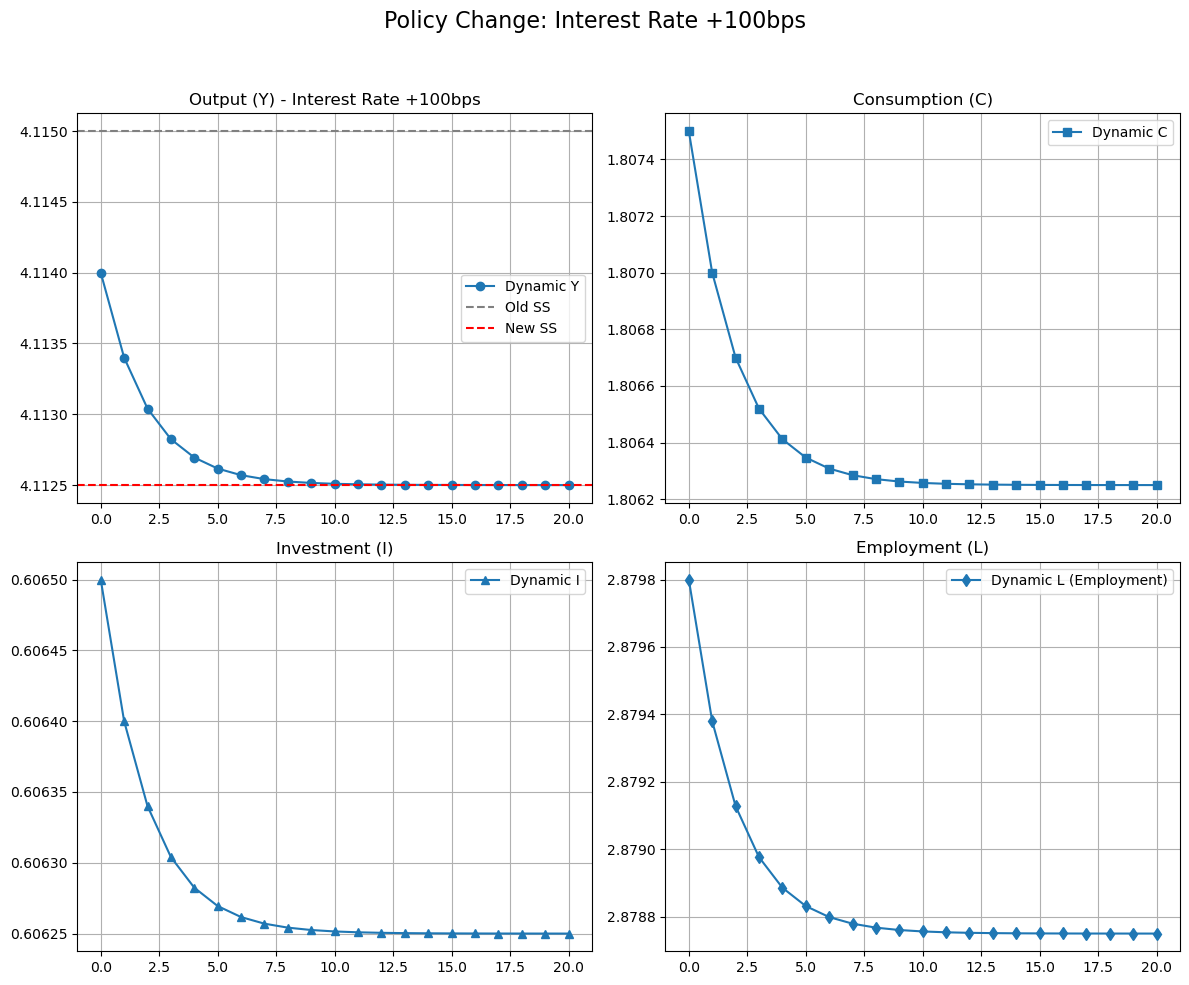

In [9]:
# Exercise 3: Policy Changes on the base steady state (c = 0.5)

policy_scenarios = {
    'Gov Spending +50%': {'G': 1.7 * 1.5, 'T': 1.7, 'i': 0.04},
    'Taxes +30%': {'G': 1.7, 'T': 1.7 * 1.3, 'i': 0.04},
    'Interest Rate +100bps': {'G': 1.7, 'T': 1.7, 'i': 0.04 + 0.01}
}

for name, change in policy_scenarios.items():
    p_new = get_params(c=0.5, G=change['G'], T=change['T'], i=change['i'])
    Y_ss_new, C_ss_new, I_ss_new, _, _ = steady_state(p_new)
    # In Exercise 3 the economy initially starts at the original steady state computed in Exercise 1
    Y_init = Y_ss
    Y_dyn, C_dyn, I_dyn = dynamic_path(Y_init, p_new, periods)
    L_dyn = gamma * Y_dyn
    t = np.arange(0, periods+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(12,10))
    axs[0,0].plot(t, Y_dyn, 'o-', label='Dynamic Y')
    axs[0,0].axhline(Y_ss, color='grey', linestyle='--', label='Old SS')
    axs[0,0].axhline(Y_ss_new, color='red', linestyle='--', label='New SS')
    axs[0,0].set_title(f"Output (Y) - {name}")
    axs[0,0].legend()
    axs[0,0].grid(True)
    
    axs[0,1].plot(t, C_dyn, 's-', label='Dynamic C')
    axs[0,1].set_title("Consumption (C)")
    axs[0,1].legend()
    axs[0,1].grid(True)
    
    axs[1,0].plot(t, I_dyn, '^-', label='Dynamic I')
    axs[1,0].set_title("Investment (I)")
    axs[1,0].legend()
    axs[1,0].grid(True)
    
    axs[1,1].plot(t, L_dyn, 'd-', label='Dynamic L (Employment)')
    axs[1,1].set_title("Employment (L)")
    axs[1,1].legend()
    axs[1,1].grid(True)
    
    plt.suptitle(f"Policy Change: {name}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()